# Lab 4

## Artyom Iudin BVT2101

# Chapters <a class="anchor" id="chapters"></a>
0. [Import](#import)
1. [Preprocessing](#preprocessing)
2. [Selection](#selection)
3. [Median and Deviation for Fare](#med_dev_fare)
4. [Middle age and Old one](#mid_old_age)
5. [Woman vs Man](#woman_vs_man)
6. [Most popular male name](#male_name)
7. [Fare and Age distribution](#fare_age)

# 0. [Import](#chapters) <a class="anchor" id="import"></a>

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# 1. [Preprocessing](#chapters) <a class="anchor" id="preprocessing"></a>

## 1. [Create train_df](#chapters)

In [62]:
train_df = pd.read_csv('../datasets/titanic_train.csv')
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
402,403,0,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C
686,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
446,447,1,2,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S
760,761,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.5000,NaN,S
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S
768,769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,NaN,Q
725,726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,NaN,S


## 2. [Create test_df](#chapters)

In [63]:
test_df = pd.read_csv('../datasets/titanic_test.csv')
test_df.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
118,1010,1,"Beattie, Mr. Thomson",male,36.00,0,0,13050,75.2417,C6,C
369,1261,2,"Pallas y Castello, Mr. Emilio",male,29.00,0,0,SC/PARIS 2147,13.8583,NaN,C
378,1270,1,"Hipkins, Mr. William Edward",male,55.00,0,0,680,50.0000,C39,S
228,1120,3,"Everett, Mr. Thomas James",male,40.50,0,0,C.A. 6212,15.1000,NaN,S
307,1199,3,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.3500,NaN,S
269,1161,3,"Pokrnic, Mr. Mate",male,17.00,0,0,315095,8.6625,NaN,S
47,939,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,NaN,Q
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.00,1,4,19950,263.0000,C23 C25 C27,S
170,1062,3,"Lithman, Mr. Simon",male,NaN,0,0,S.O./P.P. 251,7.5500,NaN,S
204,1096,2,"Andrew, Mr. Frank Thomas",male,25.00,0,0,C.A. 34050,10.5000,NaN,S


## 3. [DataFrame shape](#chapters)

In [64]:
print(f"There is {train_df.shape[0]} rows and {train_df.shape[1]} columns with\
 {train_df.shape[0] * train_df.shape[1]} elements in total in train_df")

There is 891 rows and 12 columns with 10692 elements in total in train_df


In [65]:
print(f"There is {test_df.shape[0]} rows and {test_df.shape[1]} columns with\
 {test_df.shape[0] * test_df.shape[1]} elements in total in test_df")

There is 418 rows and 11 columns with 4598 elements in total in test_df


## 4. [Null values](#chapters)

In [66]:
if any(train_df.isnull().sum()):
    print(train_df.isnull().sum())
else:
    print("No null values")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## 5. [Age values](#chapters)

19.87 % missed values in Age
Age median is equal to 28.0, mean is equal to 29.70


<Axes: >

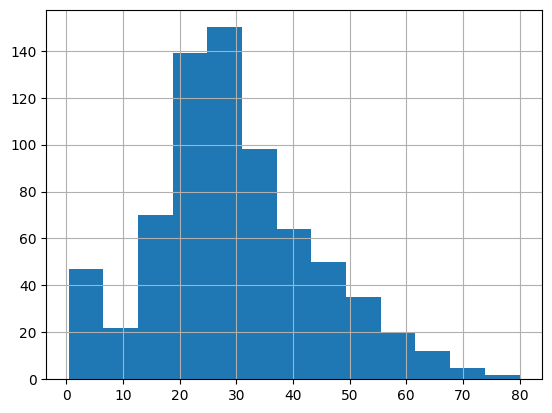

In [67]:
print(f"{(train_df.isnull().sum().loc['Age'] / train_df.shape[0]) * 100:.2f} % missed\
 values in Age")

print(f"Age median is equal to {train_df.Age.median()}, mean is equal to {train_df.Age.mean():.2f}")

train_df.Age.hist(bins=13)

## 6. [Cabin values](#chapters)

In [68]:
print(f"{(train_df.isnull().sum().loc['Cabin'] / train_df.shape[0]) * 100:.2f} % missed\
 values in Cabin")

77.10 % missed values in Cabin


## 7. [Embarked values](#chapters)

In [69]:
print(f"{(train_df.isnull().sum().loc['Embarked'] / train_df.shape[0]) * 100:.2f} % missed\
 values in Embarked")

0.22 % missed values in Embarked


## 8. [Filling null values](#chapters)

In [70]:
train_df.fillna({'Age':train_df.Age.mean(), 'Embarked':train_df.Embarked.mode().values[0]}, inplace=True)
train_df.drop('Cabin', axis='columns', inplace=True)

## 9. [Any null values?](#chapters)

In [71]:
if any(train_df.isnull().sum()):
    print(train_df.isnull().sum())
else:
    print("No null values")

No null values


## 10. [Is anyone single?](#chapters)

In [79]:
train_df['Single'] = ((train_df['SibSp'] > 0) | (train_df['Parch'] > 0)).astype(int)
train_df.sample(10)

## 11. [Dummies](#chapters)

# 2. [Selection](#chapters) <a class="anchor" id="selection"></a>